In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('/content/Carbon Emission.csv')
print(df.head())
print(df.columns)

      Sex         Diet     Transport  Vehicle Monthly Distance Km  \
0  female  pescatarian        public                          210   
1  female   vegetarian  walk/bicycle                            9   
2    male     omnivore       private                         2472   
3    male     omnivore  walk/bicycle                           74   
4  female   vegetarian       private                         8457   

   CarbonEmission  
0            2238  
1            1892  
2            2595  
3            1074  
4            4743  
Index(['Sex', 'Diet', 'Transport', 'Vehicle Monthly Distance Km',
       'CarbonEmission'],
      dtype='object')


In [24]:
# Step 3: Preprocess Data
# Rename columns

df = df.rename(columns={
    'Diet': 'diet',
    'Sex': 'sex',
    'Transport': 'transport_type',
    'Vehicle Monthly Distance Km': 'transport_km',
})

In [8]:
print(df.columns)

Index(['sex', 'diet', 'transport_type', 'transport_km', 'CarbonEmission'], dtype='object')


In [9]:
#Label Encoding

# Columns to label encode
cols_to_encode = ['diet', 'sex', 'transport_type']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

print(df)

      sex  diet  transport_type  transport_km  CarbonEmission
0       0     1               1           210            2238
1       0     3               2             9            1892
2       1     0               0          2472            2595
3       1     0               2            74            1074
4       0     3               0          8457            4743
...   ...   ...             ...           ...             ...
9995    1     0               0           268            2408
9996    0     2               0          5316            3084
9997    0     3               2            96            2377
9998    1     2               0          8688            4574
9999    1     1               0          9952             826

[10000 rows x 5 columns]


In [10]:
print(df.dtypes)

sex               int64
diet              int64
transport_type    int64
transport_km      int64
CarbonEmission    int64
dtype: object


In [11]:
X = df.drop('CarbonEmission', axis=1)
y = df['CarbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")

Linear Regression MSE: 618994.02


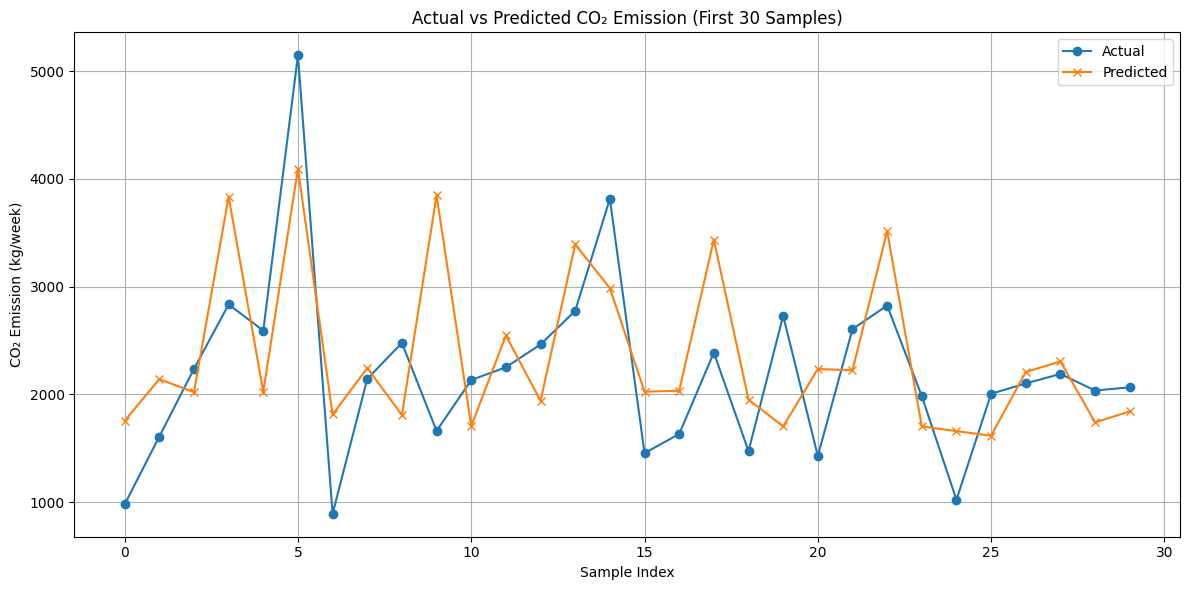

In [22]:
# Step 7: Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted CO₂ Emission (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/week)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()